<a href="https://colab.research.google.com/github/Taha-Sayyed/Machine-Learning-Project/blob/main/Classifier_Updated_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.3 MB/s eta 0:00:00


In [2]:
import cv2 as cv
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #This variable determines the minimum severity of log messages that TensorFlow’s C++ backend will display.

In [22]:
import os

dataset_path = "/content/drive/MyDrive/Face_Recognition/Dataset"
print("Files in directory:", os.listdir(dataset_path))

Files in directory: ['taha_sayyed', 'yaseen_sayyed']


In [44]:
from mtcnn.mtcnn import MTCNN

class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')


In [24]:
faceloading=FACELOADING("/content/drive/MyDrive/Face_Recognition/Dataset")
X,Y= faceloading.load_classes()


Loaded successfully: 270
Loaded successfully: 250


# **Information of FaceNet**

**1} Function Definition**

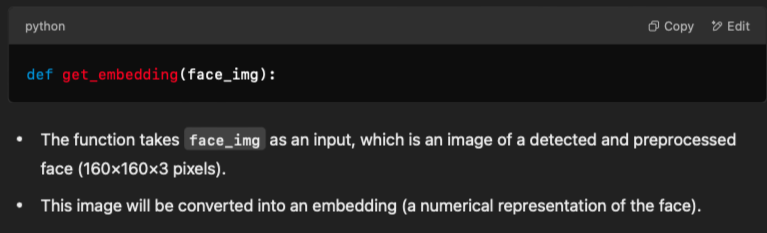

**2} Convert Image to Float32**



1.   Face images are typically stored as integers (0-255).
2.   Neural networks work best with floating-point values, so this line converts face_img to float32 format
3.   The image is still a 3D array (160×160×3).







**3} Add a batch dimension**

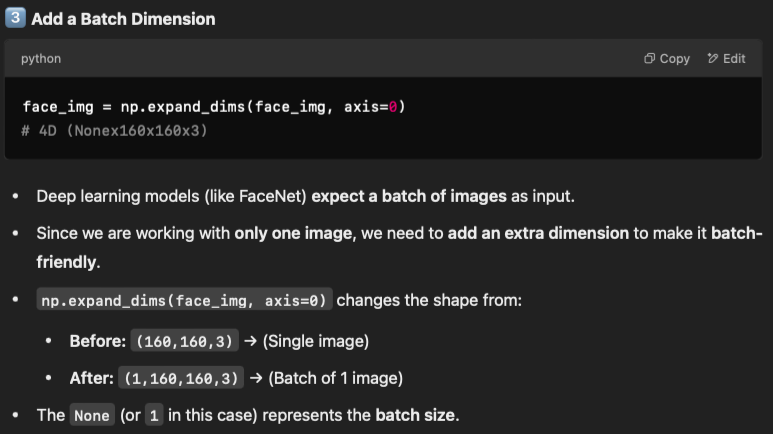

**4} Generate Face Embedding**

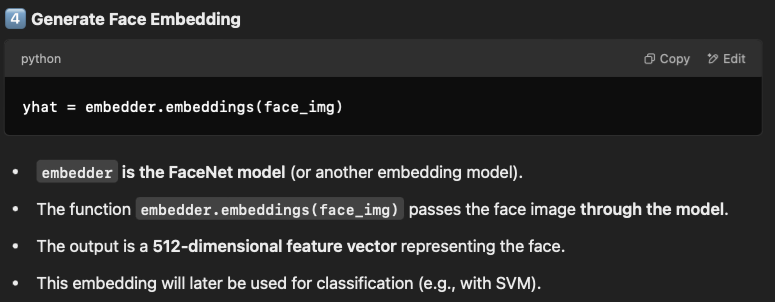

**5} Return the Embedding**

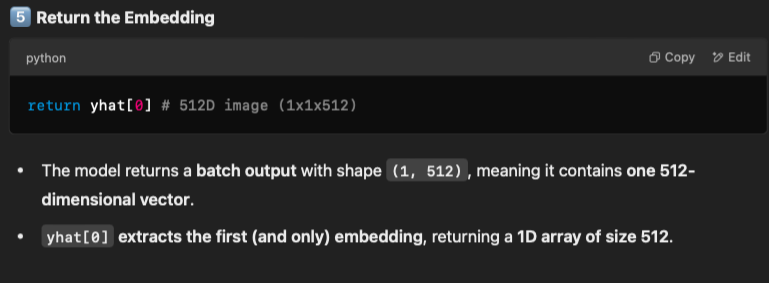

In [6]:
!pip install keras-facenet


  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=2f0dae91136ce6f6c5c1bd74390ea4ebcacdd4989d7d3a6aaac985a8e583a5c2
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras-facenet


In [25]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)


In [26]:
EMBEDDED_X = [] #Empty list

for img in X:
    EMBEDDED_X.append(get_embedding(img))

#After collecting all embeddings, the list is converted into a NumPy array since numpy array are faster to process

EMBEDDED_X = np.asarray(EMBEDDED_X)



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [27]:
print(EMBEDDED_X.shape)

(520, 512)


In [28]:
print(Y)
print(Y.shape)

['taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed'
 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed'
 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed'
 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed'
 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed'
 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed'
 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed'
 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed'
 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed'
 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed'
 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed'
 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed'
 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed'
 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed' 'taha_sayyed'
 'taha

# **Preprocessing the data before implementing model**

**1} Importing LabelEncoder**

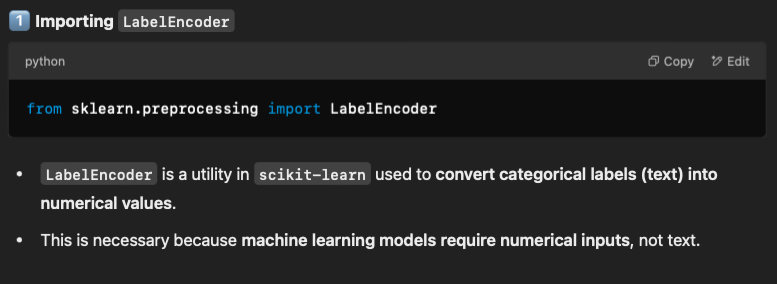

**2} Creating an Instance of LabelEncoder**


1.   LabelEncoder() is initialized and stored in the variable encoder.
2.   This object will be used to convert names into numbers.



**3} Fitting the Encoder to Y (Labels)**
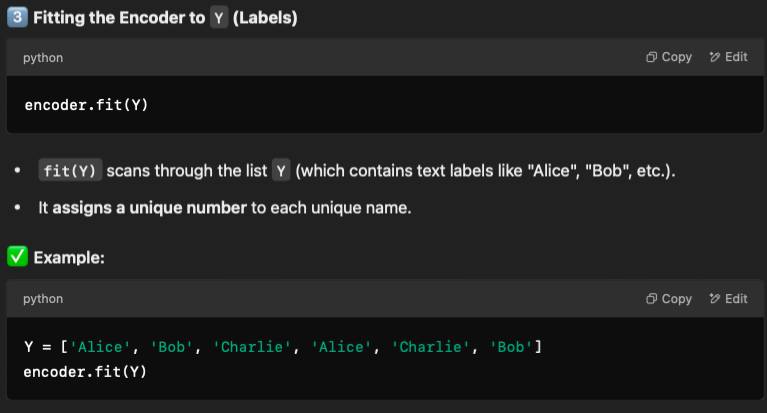

**4} Transforming Labels from Text to Numbers**
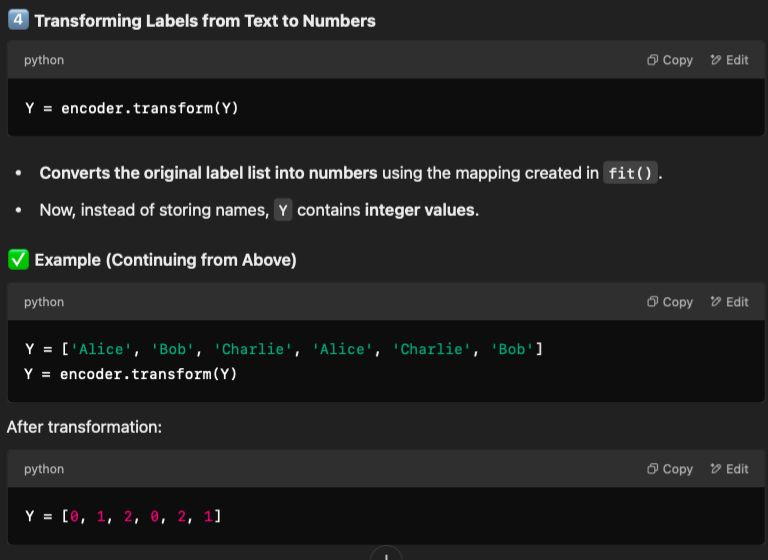

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(Y)
Y=encoder.transform(Y)

In [30]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

# **SVM**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(EMBEDDED_X,Y,shuffle=True,random_state=17,test_size=0.2)
print(f"X:train {X_train}")
print(f"Y:train {Y_train}")
print(f"X:test  {X_test}")
print(f"Y:test  {Y_test}")




X:train [[-0.00785536  0.0461212   0.00067173 ... -0.05424463 -0.08833176
   0.00836794]
 [-0.01016262  0.01797039  0.01172447 ... -0.08363362 -0.06861004
  -0.01655681]
 [-0.05506435 -0.00865662 -0.04091417 ... -0.0676048  -0.08561099
   0.0322489 ]
 ...
 [-0.08513819  0.0329436  -0.04948028 ... -0.09182135 -0.10787711
   0.04959448]
 [-0.01625377  0.00926174  0.00451302 ... -0.08266844 -0.06950521
  -0.01277997]
 [ 0.03691288  0.01034728 -0.02273104 ... -0.02102667 -0.08360832
   0.02364306]]
Y:train [0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0
 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1

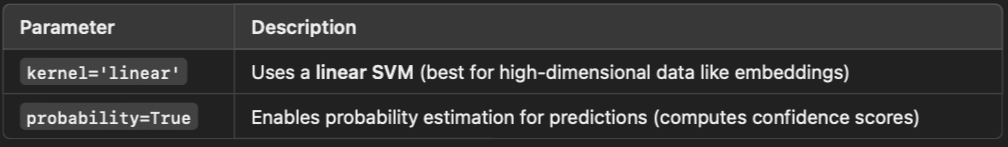

In [33]:
from sklearn.svm import SVC
model=SVC(kernel='linear',probability=True)
model.fit(X_train,Y_train)

SVC(kernel='linear', probability=True)

**1} Predict Training Set Labels**

Purpose: Predicts the labels for the training data (X_train).


1.   X_train contains the face embeddings for the training dataset.
2.   The trained SVM classifier checks each embedding and assigns a label
3.   The predictions are stored in ypreds_train.





In [34]:
ypreds_train=model.predict(X_train)

In [36]:
#Lets see how well te model learn

#IF the ypreds_train is same as Y_train then we can say that the model well learn

print(f"Y_train: {Y_train}")
print(" ")
print(f"ypreds_train: {ypreds_train}")

Y_train: [0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0
 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0
 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0
 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1
 0 1 0 1 1 1 1 0 0]
 
ypreds_train: [0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 

**2} Predict Test Set Labels**

Purpose: Predicts the labels for the testing data (X_test).

In [38]:
ypreds_test=model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [41]:
print(f"Evaluating the accuracy score Y_train and ypreds_train: {accuracy_score(Y_train,ypreds_train)}")
print(f"Evaluating accuracy score Y_test and ypreds_test: {accuracy_score(Y_test,ypreds_test)}")

Evaluating the accuracy score Y_train and ypreds_train: 1.0
Evaluating accuracy score Y_test and ypreds_test: 1.0


# **Its time to test the model**

In [52]:
from mtcnn.mtcnn import MTCNN
detector=MTCNN()
t_im=cv.imread("/content/drive/MyDrive/Face_Recognition/taha.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

In [53]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [54]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [55]:
print(ypreds)

[0]


In [56]:
encoder.inverse_transform(ypreds)

array(['taha_sayyed'], dtype='<U13')

In [58]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)
